In [1]:
from keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
#download mnist fashion data and split into train and test sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

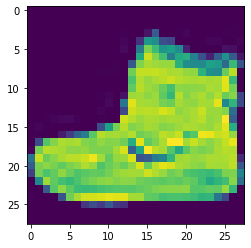

In [3]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [4]:
from tensorflow.keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [5]:
#normalization

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(60000,-1))
X_test = scaler.fit_transform(X_test.reshape(10000,-1))

In [6]:
X_train.shape

(60000, 784)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=676) # The feature is reduced from 28 to 26 using PCA. Therefore the n_components are 26 x 26 = 676
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# X_train and x_test must be reshaped back to 2 Dimensional matrix to fit the model (Conv2D)

X_train = X_train.reshape(-1,26,26,1)
X_test = X_test.reshape(-1,26,26,1) 

In [8]:
#check image shape
X_train.shape

(60000, 26, 26, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model => Sequential() allows us to build a model layer by layer
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(26,26,1))) # Conv2D because the features is in pixel which is 2d and input shape is 26 (deducted from 28 becoz pca)
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax')) #Softmax biasa digunakan pada multiclass variable dan bisa menghasilkan output beragam antara 0 dan 1

In [10]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Validation testing
from sklearn.model_selection import train_test_split
x_test, x_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.33, random_state=0)

In [12]:
model.fit(X_train, y_train, validation_data=(x_validation, y_validation), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 4ms/step - loss: 0.6075 - accuracy: 0.7986 - val_loss: 0.3965 - val_accuracy: 0.8564
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2793 - accuracy: 0.9024 - val_loss: 0.3712 - val_accuracy: 0.8730
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1805 - accuracy: 0.9360 - val_loss: 0.4016 - val_accuracy: 0.8715
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1191 - accuracy: 0.9581 - val_loss: 0.4794 - val_accuracy: 0.8691
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0865 - accuracy: 0.9712 - val_loss: 0.5715 - val_accuracy: 0.8688
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0594 - accuracy: 0.9798 - val_loss: 0.7323 - val_accuracy: 0.8639
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.9818 - val_loss: 0.8280 - val_accuracy

In [13]:
#predict images in the test set
model = model.predict(x_test)
#if the predicted model has a value greater than 0.5, then it will be converted to int 1 or so if it's lesser it will become 0
prediction = (model > 0.5).astype(int)

In [14]:
prediction

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [15]:
#actual results for the images in test set
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

#Therefore the accuracy of this training model is 86%

0.8632835820895522

**Kesimpulan** 

Model yang mengimplementasikan PCA harusnya memiliki akurasi yang lebih besar. Pada kasus ini, saya sebelumnya mendapatkan akurasi yang lebih kecil daripada model tanpa PCA yaitu 59%. Hal ini terjadi karena dikarenakan saya memasang PCA pada x_train dan x_test sekaligus (fit_transform). Hal ini membuat kita menggunakan parameter yang salah pada saat pengklasifikasian. 